In [1]:
import pandas as pd # 데이터 처리 모듈
import matplotlib.pyplot as plt # 데이터 시각화 모듈 
import seaborn as sns # 데이터 시각화 모듈

from sklearn.model_selection import train_test_split # 데이터 분할 모듈

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# CSV 파일 읽어오기, load_csv
data_f = pd.read_csv('../input/plant-diary-new/plant_diary_new.csv')

In [3]:
data_f

,day,height,leaf_width,leaf_length,owner
0,1,0.0,0.0,0,1
1,1,0.0,0.0,0,2
2,1,0.0,0.0,0,3
3,5,16.0,2.8,9,1
4,5,16.0,2.8,9,2
5,5,12.0,2.9,8,3
6,7,33.0,4.5,15,1
7,7,26.0,3.8,14,2
8,7,25.0,4.5,13,3
9,10,35.0,5.0,18,1


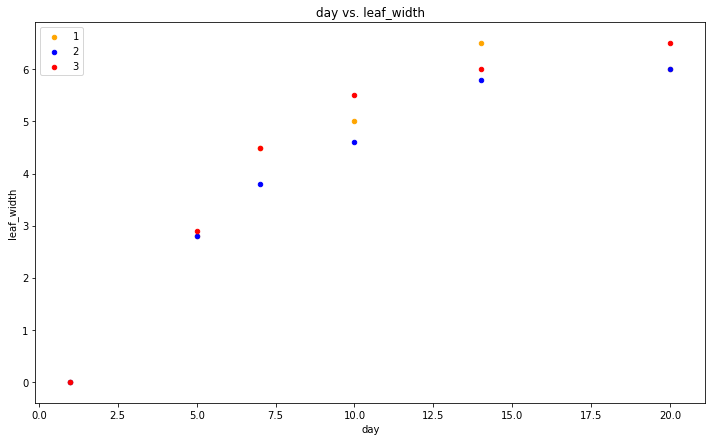

In [4]:
# 읽어온 데이터 표시하기, plot
cl = data_f['owner'].unique()

col = ['orange', 'blue', 'red', 'yellow', 'black', 'brown']

fig = data_f[data_f['owner'] == cl[0]].plot(kind='scatter', x='day', y='leaf_width', color=col[0], label=cl[0])

for i in range(len(cl)-1):
    data_f[data_f['owner'] == cl[i+1]].plot(kind='scatter', x='day', y='leaf_width', color=col[i+1], label=cl[i+1], ax=fig)

fig.set_xlabel('day')
fig.set_ylabel('leaf_width')
fig.set_title('day' + " vs. " + 'leaf_width')
fig=plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

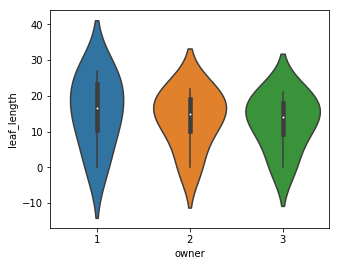

In [5]:
# violin 형태로 보여주기, violin_plot
plt.figure(figsize=(5,4))
plt.subplot(1,1,1)
sns.violinplot(x='owner',y='leaf_length',data=data_f)
plt.show()

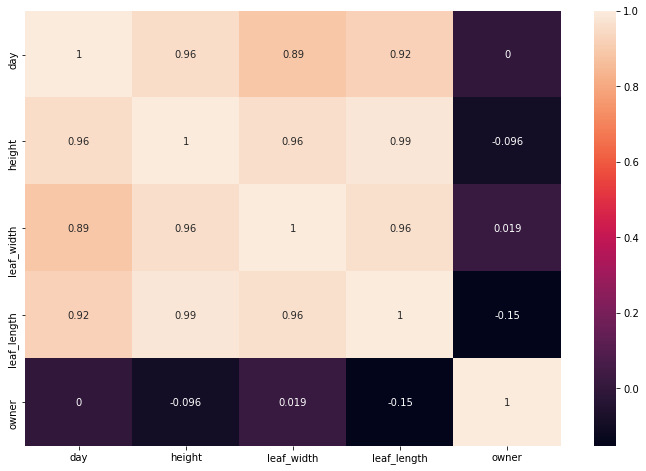

In [6]:
# heatmap 보여주기, show_heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data_f[['day', 'height', 'leaf_width', 'leaf_length', 'owner']].corr(),annot=True)
plt.show()

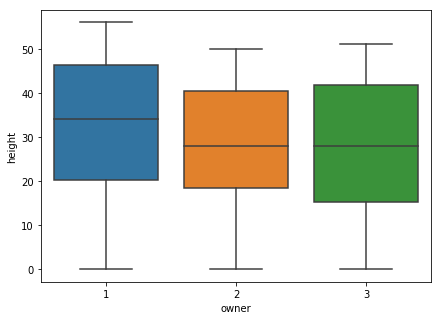

In [7]:
# boxplot 보여주기, box_plot
f, sub = plt.subplots(1, 1,figsize=(7,5))
sns.boxplot(x=data_f['owner'],y=data_f['height'], ax=sub)
sub.set(xlabel='owner', ylabel='height');
plt.show()

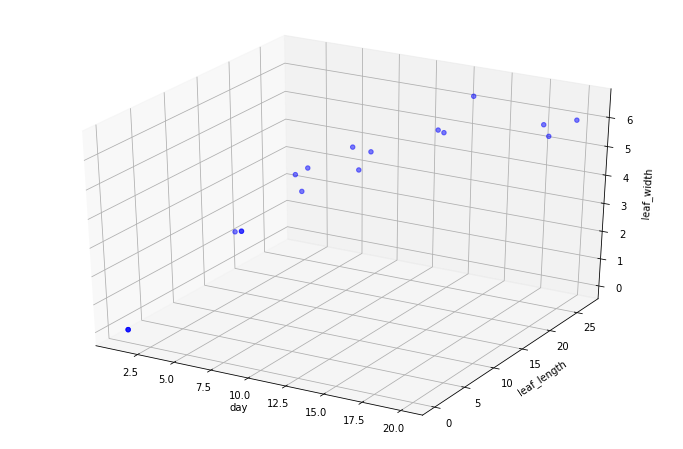

In [8]:
#3차원으로 보여주기, 3d_plot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(12,8))

ax=fig.add_subplot(1,1,1, projection="3d")
ax.scatter(data_f['day'],data_f['leaf_length'],data_f['leaf_width'],c="blue",alpha=.5)
ax.set(xlabel='day',ylabel='leaf_length',zlabel='leaf_width')
plt.show()

In [9]:
# 학습용 문제, 학습용 정답, 테스트용 문제, 테스용 정답으로 데이터를 4개로 쪼개기, split_4_parts
train, test = train_test_split(data_f, train_size = 0.8)

# 학습용 문제와 정답
train_X = train[['day']]
train_y = train.height

# 테스트용 문제와 정답
test_X = test[['day']] 
test_y = test.height

In [10]:
# 시험공부시키
gildong = DecisionTreeRegressor(random_state = 0)
gildong.fit(train_X, train_y) #학습용 문제, 학습용 정답

# 테스트한(기말고사) 후 점수까지 계산하기
score = gildong.score(test_X, test_y) #테스트 문제, 테스트 정답
print('Score:', format(score,'.3f')) # score의 의미: 정확하게 예측하면 1, 평균으로 예측하면 0, 더 못 예측하면 음수

# 테스트 문제지와 정답 출력해보기
print (test_X) #입력: 10일 후에는
print ('-----')
print (test_y) #정답: 35만큼 자란다.

# 테스트 문제 전부 주고 테스트하기
predicted = gildong.predict(test_X)
print('Predicted:', predicted)
print('Correct answer:\n', test_y)

# 테스트 문제 일부 주고 테스트하기
predicted = gildong.predict([[2], [11], [60]])
print(predicted)

Score: 0.954
    day
17   20
8     7
16   20
1     1
-----
17    51.0
8     25.0
16    50.0
1      0.0
Name: height, dtype: float64
Predicted: [56.  29.5 56.   0. ]
Correct answer:
 17    51.0
8     25.0
16    50.0
1      0.0
Name: height, dtype: float64
[ 0. 32. 56.]


In [11]:
# 기타 다른 머신러닝 알고리즘들
cheolsu = KNeighborsRegressor(n_neighbors=2)

youngja = LinearRegression()

minsu = RandomForestRegressor(n_estimators=28,random_state=0)